# COVID 19 Data Analysis

## 1. Preparing Data for Analysis

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [59]:
files = sorted(os.listdir("/Users/glen/Downloads/Covid-19"))
files

['country_wise_latest.csv',
 'covid_19_clean_complete.csv',
 'day_wise.csv',
 'full_grouped.csv',
 'usa_country_wise.csv',
 'worldometer_data.csv']

In [60]:
def read_data(path, filename):
    return pd.read_csv(path+'/'+filename)

In [61]:
path = "/Users/glen/Downloads/Covid-19"
world_data = read_data(path, 'worldometer_data.csv')

In [62]:
province_data = read_data(path, files[1])

In [63]:
day_wise = read_data(path, files[2])

In [64]:
grouped_data = read_data(path, files[3])

In [65]:
usa_data = read_data(path, files[4])

## 2. Determining Which Country Has The Highest Total Cases, Deaths, Recovered, and Active Cases

In [67]:
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [68]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [69]:
import plotly.express as px

In [70]:
columns = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']
for col in columns:
    fig = px.treemap(world_data.iloc[0:20], values = col, path =['Country/Region'], 
            template = 'plotly_dark', 
            title = 'Treemap Representation of Different Countries W.R.T their {}'.format(col))
    fig.show()

In [71]:
'''
Inferences: 
The USA, Brazil, and India consistently rank as the top three countries with the most total cases, recoveries and active cases, possibly due to
their large populations, testing capabilities etc.

However, while Mexico ranks third in total deaths, it does not appear in the top three for total cases, recoveries, or active cases. This
discrepancy could be due to a strained healthcare system.

India's presence in the top three for recoveries and active cases, but absence in the top three for deaths might suggest a relatively lower
case fatality rate, potentially due to effective healthcare measures.

'''

"\nInferences: \nThe USA, Brazil, and India consistently rank as the top three countries with the most total cases, recoveries and active cases, possibly due to\ntheir large populations, testing capabilities etc.\n\nHowever, while Mexico ranks third in total deaths, it does not appear in the top three for total cases, recoveries, or active cases. This\ndiscrepancy could be due to a strained healthcare system.\n\nIndia's presence in the top three for recoveries and active cases, but absence in the top three for deaths might suggest a relatively lower\ncase fatality rate, potentially due to effective healthcare measures.\n\n"

## 3. Determining The Trend Of Confirmed Deaths, Recovered, And Active Cases

In [73]:
day_wise.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

In [74]:
px.line(day_wise, x='Date', y= ['Confirmed', 'Deaths', 'Recovered', 'Active'], 
       title = 'Covid Cases W.R.T Date', template = 'plotly_dark')

In [75]:
'''
Inferences:
Confirmed cases: There is a rapid and exponential increase in the number of confirmed cases especially from March 2020 onwards, 
suggesting widespread transmission then.

Recovered Cases: The number of recovered cases follows a steady increase, and has a similar trend to that of confirmed cases. This indicates
that recovery effects to manage the pandemic were largely successful.

Deaths: Follows a weak but increasing trend that is much weaker than confirmed and recovered cases.

Active Cases: There is a steady increase, indicating the ongoing burden of the pandemic worldwide
'''

'\nInferences:\nConfirmed cases: There is a rapid and exponential increase in the number of confirmed cases especially from March 2020 onwards, \nsuggesting widespread transmission then.\n\nRecovered Cases: The number of recovered cases follows a steady increase, and has a similar trend to that of confirmed cases. This indicates\nthat recovery effects to manage the pandemic were largely successful.\n\nDeaths: Follows a weak but increasing trend that is much weaker than confirmed and recovered cases.\n\nActive Cases: There is a steady increase, indicating the ongoing burden of the pandemic worldwide\n'

## 4. BarPlot Representation of the Population to Tests Done Ratio

In [77]:
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [78]:
pop_test_ratio = world_data['Population']/world_data['TotalTests'].iloc[0:20]
pop_test_ratio

0       5.245489
1      16.106896
2      62.365033
3       4.911040
4      18.852446
         ...    
204          NaN
205          NaN
206          NaN
207          NaN
208          NaN
Length: 209, dtype: float64

In [79]:
fig = px.bar(world_data.iloc[0:20], x = 'Country/Region', y = pop_test_ratio[0:20], color='Country/Region',
       title = 'Population to Tests Done ratio', template = 'plotly_dark')
fig.show()

In [80]:
'''
Inference:
Countries like Bangladesh and Mexico have much higher ratios, suggesting fewer tests are conducted relative to 
their population sizes. On the other hand countries like USA and Russia have lower ratios suggesting a higher number 
of tests performed per capita.
A lower ratio could suggest a better healthcare infrastructure, or resource allocation w.r.t testing during the pandemic. Countries with 
a higher ratio may be facing challenges like limited testing facilities and lack of resources.
'''

'\nInference:\nCountries like Bangladesh and Mexico have much higher ratios, suggesting fewer tests are conducted relative to \ntheir population sizes. On the other hand countries like USA and Russia have lower ratios suggesting a higher number \nof tests performed per capita.\nA lower ratio could suggest a better healthcare infrastructure, or resource allocation w.r.t testing during the pandemic. Countries with \na higher ratio may be facing challenges like limited testing facilities and lack of resources.\n'

## 5. Determining The Countries that are badly affected by COVID 19

In [82]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [83]:
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [84]:
px.bar(world_data.iloc[0:20], x = 'Country/Region' , y = ['Serious,Critical', 'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'TotalCases'],
      template = 'plotly_dark', title = 'COVID 19 Cases W.R.T Time')

### Top 20 Countries with highest Total Confirmed Cases, Total Recovered Cases, Total Deaths, and Total Active Cases

### Top 20 Countries with Highest Total Confirmed Cases

In [87]:
fig = px.bar(world_data.iloc[0:20], y='Country/Region', x = 'TotalCases', text = 'TotalCases',
             color = 'TotalCases', template = 'plotly_dark', 
             title = 'Top 20 Countries with Highest Total Confirmed Cases')
fig.show()

### Top 20 Countries with Highest Total Deaths

In [89]:
world_data.sort_values(by = 'TotalDeaths', ascending = False)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
11,UK,Europe,6.792203e+07,308134,NaN,46413.0,NaN,NaN,NaN,NaN,73.0,4537.0,683.0,17515234.0,257873.0,Europe
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Saint Kitts and Nevis,North America,5.323700e+04,17,NaN,NaN,NaN,16.0,NaN,1.0,NaN,319.0,NaN,1146.0,21526.0,Americas
203,Greenland,North America,5.678000e+04,14,NaN,NaN,NaN,14.0,NaN,0.0,NaN,247.0,NaN,5977.0,105266.0,Europe
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN


In [90]:
fig = px.bar(world_data.sort_values(by = 'TotalDeaths', ascending = False)[0:20], y='Country/Region', x = 'TotalDeaths', text = 'TotalDeaths',
             color = 'TotalDeaths', template = 'plotly_dark', 
             title = 'Top 20 Countries with Highest Total Deaths')
fig.show()

### Top 20 Countries with Highest Active Cases

In [92]:
fig = px.bar(world_data.sort_values(by = 'ActiveCases', ascending = False)[0:20], y='Country/Region', x = 'ActiveCases', text = 'ActiveCases',
             color = 'ActiveCases', template = 'plotly_dark', 
             title = 'Top 20 Countries with Highest Active Cases')
fig.show()

### Top 20 Countries with Highest Recovered Cases

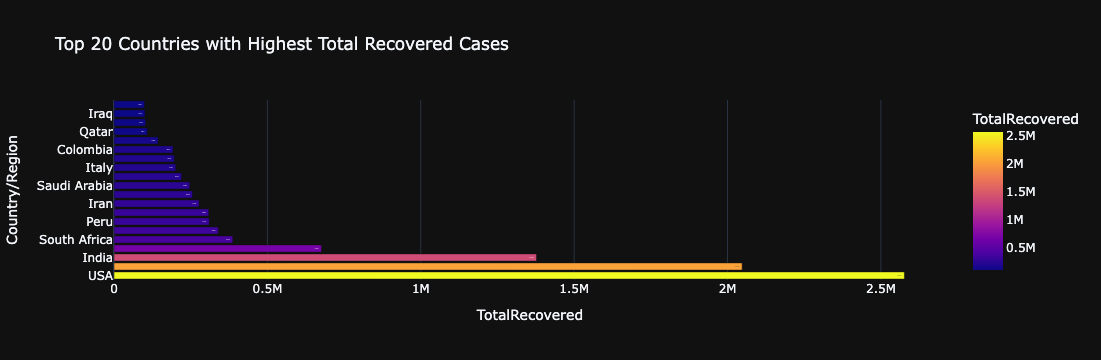

In [94]:
fig = px.bar(world_data.sort_values(by = 'TotalRecovered', ascending = False)[0:20], y='Country/Region', x = 'TotalRecovered', text = 'TotalRecovered',
             color = 'TotalRecovered', template = 'plotly_dark', 
             title = 'Top 20 Countries with Highest Total Recovered Cases')
fig.show()

### Pie Chart Representation of Statistics for Worst Affected Countries

In [96]:
labels = world_data[0:15]['Country/Region'].values
cases = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']
for case in cases:
    fig = px.pie(world_data[0:15], values = case, names = labels, template = 'plotly_dark', hole = 0.2,
           title = ' {} Recorded W.R.T WHO Region Of 15 Worst Afffected Countries'.format(case))
    fig.show()
           

### Deaths to Confirmed Cases ratio

In [98]:
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [99]:
deaths_to_confirmed = world_data['TotalDeaths']/world_data['TotalCases']
deaths_to_confirmed

0      0.032353
1      0.033810
2      0.020558
3      0.016752
4      0.017845
         ...   
204    0.076923
205         NaN
206         NaN
207         NaN
208    0.100000
Length: 209, dtype: float64

In [100]:
px.bar(world_data, x = 'Country/Region', y = deaths_to_confirmed, 
       title = 'Death to Confirmed Cases Ratio For Worst Affected Countries',
       template = 'plotly_dark')

In [158]:
'''
Inference: 
A higher death to confirmed cases ratio suggests that the COVID 19 virus is more lethal in that country
'''

'\nInference:\nA higher death to confirmed cases ratio suggests that the COVID 19 virus is more lethal in that country\n'

### Total Deaths to Total Recovered Ratio

In [102]:
death_recovered = world_data['TotalDeaths']/world_data['TotalRecovered']

In [103]:
px.bar(world_data, x = 'Country/Region', y = death_recovered, 
       title = 'Total Deaths to Total Recovered Ratio for Worst Recovered Countries',
       template = 'plotly_dark')

In [ ]:
'''
Inference: 
This ratio evaluates the impact of the virus in terms of mortality relative to recovery in the different countries. A higher ratio suggest
that a hgiher mortality rate compared to recovery rate pointing to potential strains in the healthcare system, or a lack of effective
treatments.
'''

### Tests to Confirmed Ratio

In [105]:
tests_to_confirmed = world_data['TotalTests']/world_data['TotalCases']
px.bar(world_data, x = 'Country/Region', y = tests_to_confirmed, 
       title = 'Total Tests to Confirmed Ratio for Worst Recovered Countries',
       template = 'plotly_dark')

In [ ]:
'''
Inference:
A higher ratio suggests more widespread testing in that country, which is required for controlling the pandemic.
'''

### Serious/Critical Cases to Deaths Ratio

In [107]:
serious_to_death = world_data['Serious,Critical']/world_data['TotalDeaths']
px.bar(world_data, x = 'Country/Region', y = serious_to_death, 
       title = 'Serious/Critical Cases to Death Ratio for Worst Recovered Countries',
       template = 'plotly_dark')

In [ ]:
'''
Inference:
The ratio provides insights into the capacity of healthcare systems in the various countries, to manage severe cases effectively. A lower
ratio indicates higher efficacy in treating severe cases while a higher ratio indicates that while more cases are being serious or critical,
fewer are resulting in death.
'''

In [108]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [109]:
def country_visualisation(df, country):
    data = df[df['Country/Region'] == country]
    data2 = data.loc[:, ['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
    fig = make_subplots(rows=1, cols=4, subplot_titles = ('Confirmed', 'Active', 'Recovered', 'Deaths'))

    fig.add_trace(
        go.Scatter(name = 'Confirmed', x = data2['Date'], y = data2['Confirmed']),
        row = 1, col = 1
    )
                  
    fig.add_trace(
        go.Scatter(name = 'Active', x = data2['Date'], y = data2['Active']),
        row = 1, col = 2            
    )
                  
    fig.add_trace(
        go.Scatter(name = 'Recovered', x = data2['Date'], y = data2['Recovered']),
        row = 1, col = 3
    )
                  
    fig.add_trace(
        go.Scatter(name = 'Deaths', x = data2['Date'], y = data2['Deaths']),
        row = 1, col = 4
    )
    
    fig.update_layout(height=600, width=1000, title_text="Date Vs Recorded Cases of {}".format(country),template="plotly_dark")
    fig.show()
    

In [110]:
country_visualisation(grouped_data, 'Brazil')

In [111]:
country_visualisation(grouped_data,'US')